# **Library yang Dibutuhkan**

In [ ]:
# Mengimpor labrary yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score

# **Mengumpulkan Data**

In [ ]:
# Meload dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Melakukan pengecekan nilai unik pada setiap kolom
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Nilai unik dalam {column}: {unique_values}")

Nilai unik dalam customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Nilai unik dalam gender: ['F' 'Male' 'Female' 'M' nan]
Nilai unik dalam SeniorCitizen: [0 1]
Nilai unik dalam Partner: ['Yes' 'No']
Nilai unik dalam Dependents: ['No' 'Yes']
Nilai unik dalam tenure: [1.0e+00 3.4e+01 2.0e+00 4.5e+01 8.0e+00 2.2e+01 1.0e+01 2.8e+03 6.2e+01
 1.3e+01 1.6e+01 5.8e+01 4.9e+01 2.5e+01 6.9e+01 5.2e+01 7.1e+01 2.1e+01
 1.2e+01 3.0e+01 4.7e+01 7.2e+01 1.7e+01 2.7e+01 5.0e+00 4.6e+01 1.1e+01
 7.0e+01 6.3e+01 4.3e+01 1.5e+01 6.0e+01 1.8e+01 6.6e+01 9.0e+00 3.0e+00
 3.1e+01 5.0e+01 6.4e+01 5.6e+01 7.0e+00 4.2e+01 3.5e+01 4.8e+03 2.9e+01
 6.5e+01 3.8e+01 6.8e+01 3.2e+01 5.5e+01 3.7e+01 3.6e+01 4.1e+01 6.0e+00
 4.0e+00 3.3e+01 6.7e+01 2.3e+01 5.7e+01 6.1e+01 1.4e+01 2.0e+03 5.3e+01
 2.0e+01 4.0e+01 5.9e+01 2.4e+01 4.4e+01 1.9e+01 7.1e+03 5.4e+01 5.1e+01
 2.3e+03 4.8e+01 2.8e+01     nan 2.6e+01 0.0e+00 3.9e+01]
Nilai unik dalam PhoneService: ['No' 'Yes']
N

In [ ]:
# Melakukan kategorisasi untuk kolom gender menjadi Female dan Male saja
df['gender'] = df['gender'].replace({'F': 'Female', 'M': 'Male'})
df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
# Untuk mengetahui dimensi dari dataset
df.shape

(7043, 21)

In [ ]:
#Untuk mengetahui informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Data Cleaning**

In [ ]:
#Untuk mengetahui kolom kolom yang ada pada dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Mengganti string kosong dengan NaN pada setiap kolom
df.replace(' ', np.nan, inplace=True)

In [ ]:
#Menghapus fitur yang tidak dipakai
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 20)

In [ ]:
#mengecek missing value pada tiap kolom
df.isnull().sum()

gender               5
SeniorCitizen        0
Partner              0
Dependents           0
tenure               3
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Pada kolom gender terdapat 5 data yang hilang
# Menghitung modus (nilai yang paling sering muncul) pada kolom 'gender' dan mengisi nilai NaN dengan nilai modus
df1 = df.copy()
modus_kategori = df1['gender'].mode()[0]
df1['gender'] = df1['gender'].fillna(modus_kategori)

In [ ]:
# Pada kolom tenure terdapat 3 data yang hilang maka untuk mengisi data yang hilang tersebut dengan menggunakan nilai median karena median cocok untuk data numerik
df1['tenure'].fillna(df1['tenure'].median(), inplace=True)

In [ ]:
# Pada kolom TotalCharges terdapat 11 data yang hilang maka untuk mengisi data yang hilang tersebut dengan menggunakan nilai median karena median cocok untuk data numerik
df1['TotalCharges'].fillna(df1['TotalCharges'].median(), inplace=True)

In [ ]:
#mengecek kembali missing value pada tiap kolom
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Mengecek data yang duplikat
df1.duplicated().value_counts()

False    7021
True       22
dtype: int64

In [ ]:
# Menampilkan data yang duplikat
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.7,Yes
1338,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.9,Yes
1932,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2713,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
3754,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes


In [ ]:
df1 = df1.drop_duplicates(keep='first')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   float64
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [ ]:
# Mengubah tipe data pada kolom - kolom agar sesuai dengan fungsi dari kolom tersebut
df1['TotalCharges'] = df1['TotalCharges'].astype('float64')
df1.dtypes

<ipython-input-19-a2feb452a040>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['TotalCharges'].astype('float64')


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

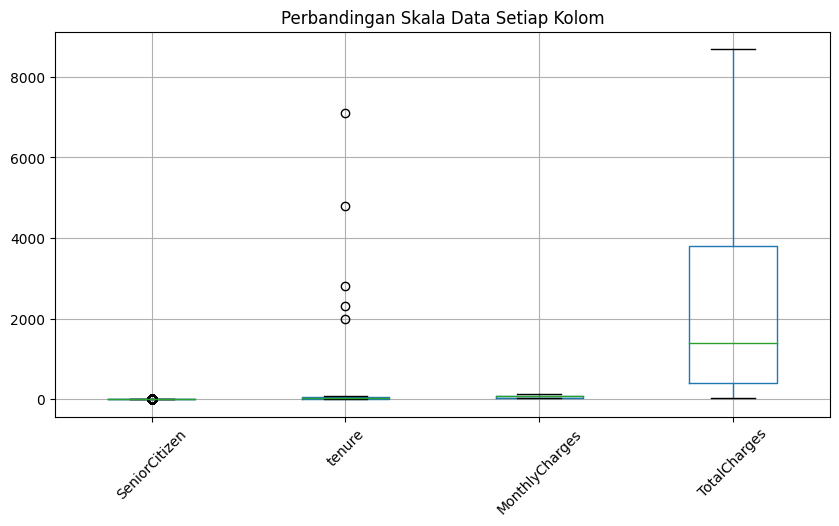

In [ ]:
#Melakukan pengecekan outlier pada setiap kolom
fig, axs = plt.subplots(figsize=(10, 5))
df1.boxplot(ax=axs)
plt.xticks(rotation=45)
plt.title('Perbandingan Skala Data Setiap Kolom')
plt.show()

In [ ]:
# Menghapus outlier dengan IQR
def remove_outliers_iqr(df1, column):
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1 = df1.loc[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1

# Menghapus outlier pada 'tenure' menggunakan IQR
df1 = remove_outliers_iqr(df1, 'tenure')

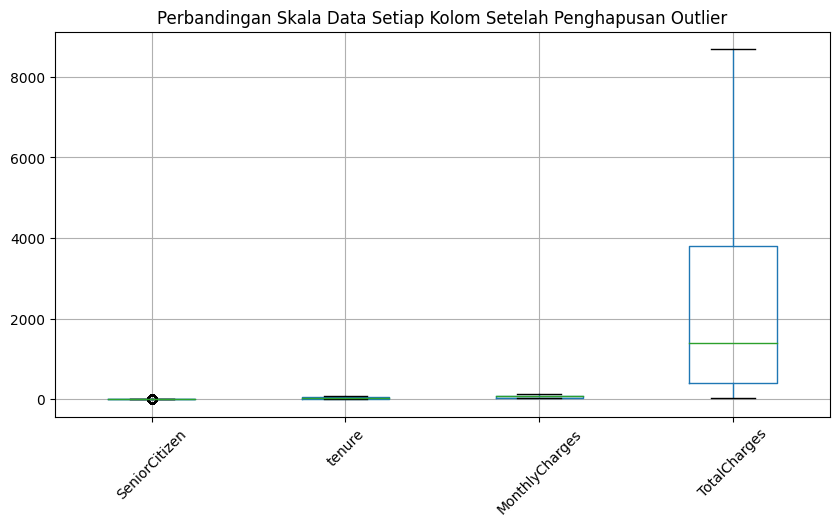

In [ ]:
#Melakukan pengecekan outlier pada setiap kolom
fig, axs = plt.subplots(figsize=(10, 5))
df1.boxplot(ax=axs)
plt.xticks(rotation=45)
plt.title('Perbandingan Skala Data Setiap Kolom Setelah Penghapusan Outlier')
plt.show()

# **EDA**

In [ ]:
# Mengecek statistika deskriptif pada dataset
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7016.000000,7016.000000,7016.000000,7016.000000
mean,0.162628,32.464937,64.855708,2289.296946
std,0.369052,24.534943,30.066761,2266.020040
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,409.550000
50%,0.000000,29.000000,70.400000,1399.825000
75%,0.000000,55.000000,89.900000,3805.137500
max,1.000000,72.000000,118.750000,8684.800000


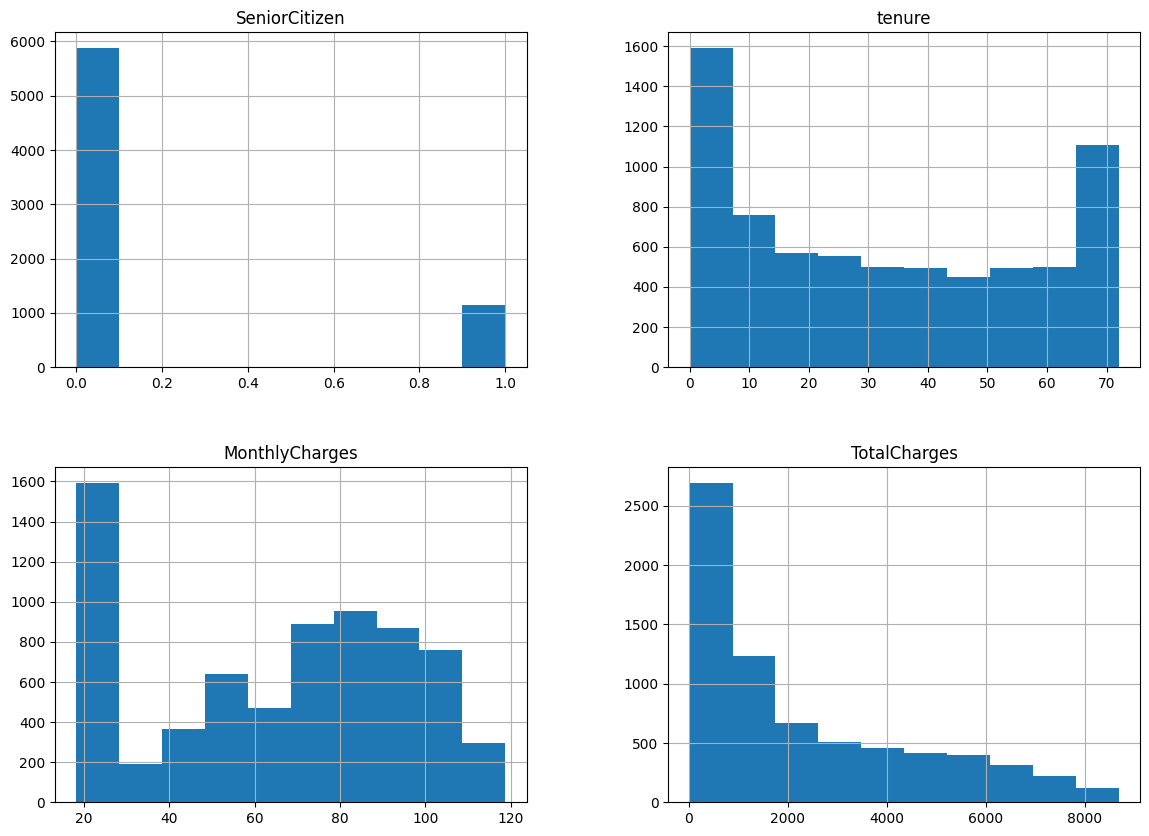

In [ ]:
# Membuat histogram seluruh kolom pada dataframe
df1.hist(figsize=(14,10))
plt.show()

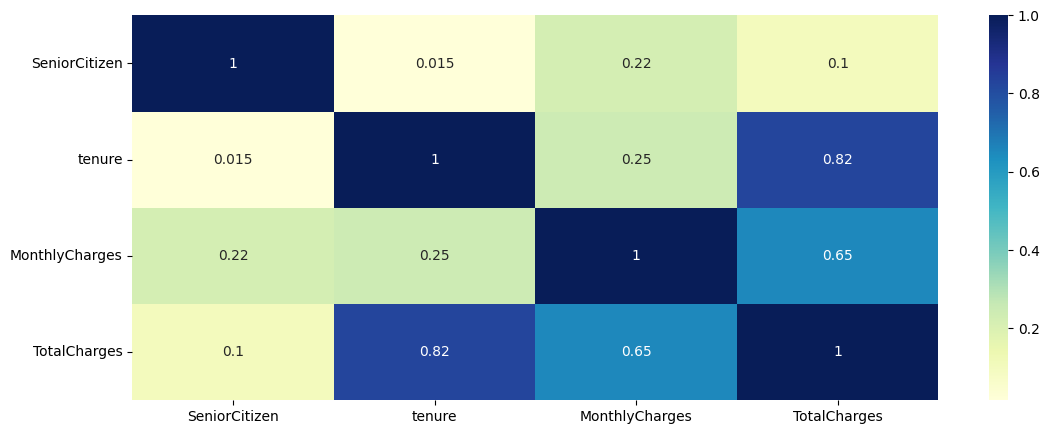

In [ ]:
#Visualisasi korelasi antar variabel
plt.figure(figsize=(13,5))
sns.heatmap(df1.select_dtypes("number").corr(), cmap="YlGnBu", annot=True);

# **Data Transformasi**

In [ ]:
#Melakukan Encoding Categorical Features
label_encoder = LabelEncoder()
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['SeniorCitizen'] = label_encoder.fit_transform(df1['SeniorCitizen'])
df1['Partner'] = label_encoder.fit_transform(df1['Partner'])
df1['Dependents'] = label_encoder.fit_transform(df1['Dependents'])
df1['PhoneService'] = label_encoder.fit_transform(df1['PhoneService'])
df1['MultipleLines'] = label_encoder.fit_transform(df1['MultipleLines'])
df1['InternetService'] = label_encoder.fit_transform(df1['InternetService'])
df1['OnlineSecurity'] = label_encoder.fit_transform(df1['OnlineSecurity'])
df1['OnlineBackup'] = label_encoder.fit_transform(df1['OnlineBackup'])
df1['DeviceProtection'] = label_encoder.fit_transform(df1['DeviceProtection'])
df1['TechSupport'] = label_encoder.fit_transform(df1['TechSupport'])
df1['StreamingTV'] = label_encoder.fit_transform(df1['StreamingTV'])
df1['StreamingMovies'] = label_encoder.fit_transform(df1['StreamingMovies'])
df1['Contract'] = label_encoder.fit_transform(df1['Contract'])
df1['PaperlessBilling'] = label_encoder.fit_transform(df1['PaperlessBilling'])
df1['PaymentMethod'] = label_encoder.fit_transform(df1['PaymentMethod'])
df1['Churn'] = label_encoder.fit_transform(df1['Churn'])

In [ ]:
target_corr = df1.select_dtypes("number").corr().drop(["Churn"])
target_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.000921,-0.000543,0.011178,0.006516,-0.006349,-0.005114,-0.000956,-0.014462,-0.011250,0.001072,-0.006253,-0.005639,-0.007971,0.000945,-0.011748,0.016027,-0.012056,0.000974,-0.008891
SeniorCitizen,-0.000921,1.000000,0.015758,-0.212260,0.015437,0.009013,0.145675,-0.031096,-0.128307,-0.013860,-0.021493,-0.151400,0.030790,0.047298,-0.143584,0.156148,-0.037568,0.219487,0.101831,0.151797
Partner,-0.000543,0.015758,1.000000,0.451931,0.377437,0.018588,0.139453,0.003005,0.150415,0.152739,0.165651,0.126237,0.136680,0.128871,0.293119,-0.015263,-0.152088,0.094508,0.316501,-0.149658
Dependents,0.011178,-0.212260,0.451931,1.000000,0.157629,-0.001041,-0.026666,0.046374,0.151998,0.090247,0.079970,0.133305,0.046274,0.020643,0.241778,-0.112107,-0.038095,-0.115901,0.061788,-0.163254
tenure,0.006516,0.015437,0.377437,0.157629,1.000000,0.009729,0.340305,-0.027583,0.326019,0.370518,0.371184,0.322901,0.288598,0.296171,0.670740,0.005396,-0.367682,0.245671,0.824928,-0.351243
PhoneService,-0.006349,0.009013,0.018588,-0.001041,0.009729,1.000000,-0.019626,0.387630,-0.015033,0.024580,0.004072,-0.018986,0.055768,0.044281,0.003016,0.016923,-0.005138,0.249143,0.114285,0.011257
MultipleLines,-0.005114,0.145675,0.139453,-0.026666,0.340305,-0.019626,1.000000,-0.107158,0.006392,0.116879,0.121533,0.010707,0.174501,0.180394,0.108936,0.165146,-0.174539,0.432308,0.451265,0.039606
InternetService,-0.000956,-0.031096,0.003005,0.046374,-0.027583,0.387630,-0.107158,1.000000,-0.029715,0.035592,0.044369,-0.027308,0.107770,0.098693,0.101967,-0.136496,0.083121,-0.320239,-0.173423,-0.047332
OnlineSecurity,-0.014462,-0.128307,0.150415,0.151998,0.326019,-0.015033,0.006392,-0.029715,1.000000,0.184232,0.175380,0.284638,0.044098,0.055399,0.374826,-0.156588,-0.097159,-0.053230,0.254091,-0.288872
OnlineBackup,-0.011250,-0.013860,0.152739,0.090247,0.370518,0.024580,0.116879,0.035592,0.184232,1.000000,0.186729,0.194863,0.146317,0.135824,0.280614,-0.012471,-0.124868,0.120793,0.375001,-0.193931


In [ ]:
target = target_corr["Churn"].sort_values(ascending=False)
target

MonthlyCharges      0.193989
PaperlessBilling    0.191014
SeniorCitizen       0.151797
PaymentMethod       0.105772
MultipleLines       0.039606
PhoneService        0.011257
gender             -0.008891
StreamingTV        -0.034523
StreamingMovies    -0.036425
InternetService    -0.047332
Partner            -0.149658
Dependents         -0.163254
DeviceProtection   -0.177021
OnlineBackup       -0.193931
TotalCharges       -0.198114
TechSupport        -0.282013
OnlineSecurity     -0.288872
tenure             -0.351243
Contract           -0.396206
Name: Churn, dtype: float64

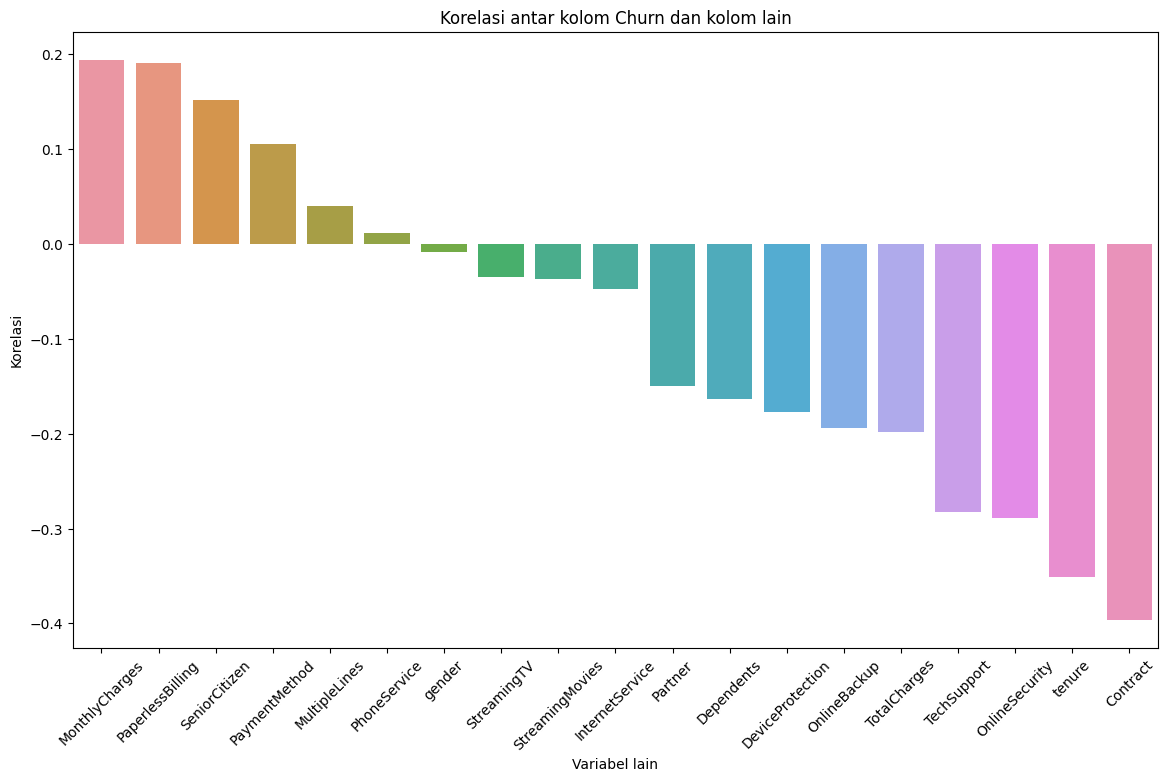

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target.index, y=target.values)
plt.xlabel('Variabel lain')
plt.ylabel('Korelasi')
plt.title('Korelasi antar kolom Churn dan kolom lain')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Transforming variabel independent dengan metode MinMaxScaler karena metode ini cocok untuk algoritma yang sensitif terhadap skala, cocok untuk data yang tidak terlalu besar, dan lebih mudah dipahami
# proses ini untuk membuat sebuah objek scaler yang akan digunakan untuk melakukan transformasi Min-Max Scaling pada data (menyamaratakan skala) antara 0 - 1
from sklearn import preprocessing
transformasi_min_max=preprocessing.MinMaxScaler()

In [ ]:
#Membagi data menjadi variabel target dan atribut
x = df1.drop('Churn', axis=1)
y = df1['Churn']

In [ ]:
#Melakukan min-max scaller terhadap data atribut (x)
nama_var_x = []
for kol in x.columns:
  nama_var_x.append(kol)

x = pd.DataFrame(data=transformasi_min_max.fit_transform(x), columns=nama_var_x)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521
7012,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.847461
7013,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809
7014,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210


In [ ]:
# Memilih fitur yang paling relevan dengan menggunakan metode chi-square
# Inisialisasi objek SelectKBest dengan metode chi-square
selector = SelectKBest(score_func=chi2, k=13)  # Menggunakan 13 fitur terbaik

# Melakukan fit transform pada data fitur
x_new = selector.fit_transform(x, y)

# Mendapatkan nilai chi-square dan p-value
scores = selector.scores_
pvalues = selector.pvalues_

# Membuat dataframe baru hanya dengan fitur terpilih dan nilai chi-square serta p-value
selected_features_indices = selector.get_support(indices=True)
selected_features = x.columns[selected_features_indices]
x_new = pd.DataFrame(data=x_new, columns=selected_features)

# Menampilkan dataframe baru
x_new

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.013889,0.0,1.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.001275
1,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,0.5,0.0,1.000000,0.385075,0.215867
2,0.0,0.0,0.0,0.027778,1.0,1.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.010310
3,0.0,0.0,0.0,0.625000,1.0,0.0,1.0,1.0,0.5,0.0,0.000000,0.239303,0.210241
4,0.0,0.0,0.0,0.027778,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7011,0.0,1.0,1.0,0.333333,1.0,0.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.227521
7012,0.0,1.0,1.0,1.000000,0.0,1.0,1.0,0.0,0.5,1.0,0.333333,0.845274,0.847461
7013,0.0,1.0,1.0,0.152778,1.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.037809
7014,1.0,1.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.033210


In [ ]:
# menghitung frekuensi kemunculan setiap nilai unik kolom y
y.value_counts()

0    5161
1    1855
Name: Churn, dtype: int64

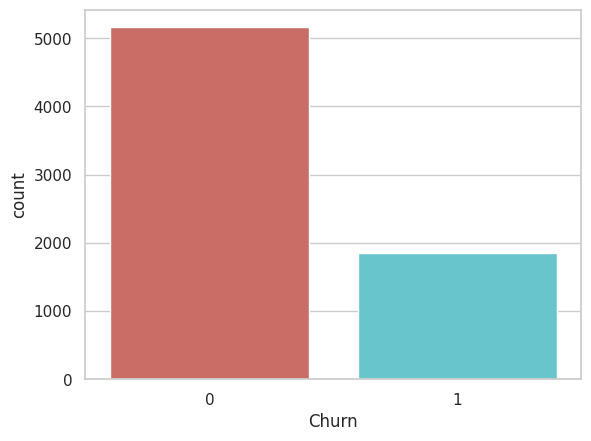

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Churn',data=df1,palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
# Data dari tabel kontingensi
observed_data = [[5161, None],
                 [None, 1855]]

# Mengisi nilai yang hilang sesuai dengan hasil perbandingan yang ada
total = 5161 + 1855
observed_data[0][1] = total - 5161
observed_data[1][0] = total - 1855

# Menghitung chi-squared dan p-value
chi2, p, _, _ = stats.chi2_contingency(observed_data)

# Derajat kebebasan
df = (len(observed_data) - 1) * (len(observed_data[0]) - 1)

# Tingkat signifikansi
alpha = 0.05

# Menampilkan hasil
print("Chi-squared:", chi2)
print("Derajat Kebebasan (df):", df)
print("p-value:", p)

# Uji signifikansi
if p < alpha:
    print("Tolak hipotesis nol: Terdapat hubungan yang signifikan antara Independents dan Dependents.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol: Perbandingan seimbang atau acak.")

Chi-squared: 0.0
Derajat Kebebasan (df): 1
p-value: 1.0
Tidak cukup bukti untuk menolak hipotesis nol: Perbandingan seimbang atau acak.


1. Dalam menentukan model terbaik dengan konteks tujuan bisnis untuk menghindari false positif, bisa menggunakan perbandingan nilai f-1 score dan presisi pada setiap model berdasarkan nilai unik pada kolom dependent jika hasilnya tidak seimbang. Namun bisa menggunakan perbandingan nilai akurasi dengan jika nilai unik pada kolom dependent seimbang. Untuk membuktikan apakah nilai unik pada kolom dependent seimbang dengan menggunakan perhitungan chi-square. Dari hasil chi-square tersebut adalah seimbang sehingga kita membandingkan nilai akurasi

# **Modelling**

In [ ]:
# Melakukan splliting data menjadi data train dan data test (80% dan 20%)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 5262 rows
Test Set: 1754 rows


In [ ]:
#mengimplementasi algoritma klasifikasi (Decision Tree dan Random Forest) menggunakan scikit-learn untuk pemodelan klasifikasi.

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# **Evaluasi**

In [ ]:
# Menghasilkan confusion matrix untuk setiap model klasifikasi
actual = y_test  # Nilai target sebenarnya
# Membuat confusion matrix pada setiap model klasifikasi
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)

# Mengubah confusion matrix menjadi DataFrames
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

In [ ]:
# Mengubah confusion matrix menjadi DataFrames dengan label
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)

In [ ]:
# Mengelurkan hasil confusion matrix pada model Decision Tree
print('Decision tree confusion matrix:')
dt_cm_df

Decision tree confusion matrix:


Predicted,0,1
Actual,,
0,1035,239
1,235,245


In [ ]:
# Mengelurkan hasil confusion matrix pada model Random Forest
print('Random forest confusion matrix:')
rf_cm_df

Random forest confusion matrix:


Predicted,0,1
Actual,,
0,1137,137
1,256,224


In [ ]:
# Mengeluarkan Accuracy, Precision, Recall, F1-score pada model Decision Tree
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1274
           1       0.51      0.51      0.51       480

    accuracy                           0.73      1754
   macro avg       0.66      0.66      0.66      1754
weighted avg       0.73      0.73      0.73      1754



In [ ]:
# Mengeluarkan Accuracy, Precision, Recall, F1-score pada model Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1274
           1       0.62      0.47      0.53       480

    accuracy                           0.78      1754
   macro avg       0.72      0.68      0.69      1754
weighted avg       0.76      0.78      0.77      1754



In [ ]:
# Membandingkan nilai akurasi pada tiap model karena nilai unik pada kolom independent seimbang, sudah dibuktikan dengan perhitungan chi-square

# Menghitung akurasi untuk model Decision Tree
dt_accuracy = accuracy_score(y_test, dt_pred)

# Menghitung akurasi untuk model Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)

# Menampilkan hasil akurasi untuk setiap model
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Decision Tree Accuracy: 0.7297605473204105
Random Forest Accuracy: 0.7759407069555302


In [ ]:
# Memilih model terbaik berdasarkan confuison matrix
# Model dengan nilai akurasi tertinggi adalah model terbaik
models = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy
}
best_model = max(models, key=models.get)
print("Best Model:", best_model)

Best Model: Random Forest


# **Feature Importance**

In [ ]:
# metode pemilihan variabel (menggunakan Univariate Feature Selection)
# Metode ini mengukur hubungan antara setiap fitur secara individu dengan target.
selector = SelectKBest(score_func=f_classif, k=1)  # Pilih 1 variabel terbaik
# Melatih pemilihan fitur pada variabel dependent
X_selected = selector.fit_transform(x, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = x.columns[selected_feature_indices]

In [ ]:
selector

SelectKBest(k=1)

In [ ]:
selected_feature_names

Index(['Contract'], dtype='object')

2. Untuk melihat variabel mana yang sangat berpengaruh dengan variabel independen, salah satunya dapat menggunakan Univariate Feature Selection untuk melatih pemilihan fitur pada data, dan kemudian menggunakan fitur yang telah diseleksi untuk melatih model Random Forest. Akurasi model pada data uji kemudian diukur. pada hasil uji fitur yang paling mempengaruhi adalah fitur Contract

# **Cross Validation**

In [ ]:
# Melakukan cross-validation dengan model yang telah diinisialisasi
scores = cross_val_score(dt, x_new, y, cv=5)  # cv=5 menunjukkan 5 fold cross-validation

# Menampilkan akurasi dari setiap fold
print("Akurasi setiap fold:", scores)

# Menampilkan rata-rata akurasi dari cross-validation
print("Rata-rata akurasi:", scores.mean())

Akurasi setiap fold: [0.73789174 0.73841768 0.71347113 0.70990734 0.72344975]
Rata-rata akurasi: 0.7246275279062163


In [ ]:
# Melakukan cross-validation dengan model yang telah diinisialisasi
scores = cross_val_score(rf, x_new, y, cv=5)  # cv=5 menunjukkan 5 fold cross-validation

# Menampilkan akurasi dari setiap fold
print("Akurasi setiap fold:", scores)

# Menampilkan rata-rata akurasi dari cross-validation
print("Rata-rata akurasi:", scores.mean())

Akurasi setiap fold: [0.7962963  0.78973628 0.77619387 0.78973628 0.78688525]
Rata-rata akurasi: 0.7877695942556955


Setelah dilakukan cross validation hasil akurasi mengalami kenaikan